## What is Gen AI:

Generative AI is a branch of artificial intelligence that focuses on creating new content—such as text, images, music, or even code—by learning from existing data. Instead of simply analyzing or predicting outcomes like traditional AI, generative AI can generate original outputs that mimic human creativity.

How Generative AI Works
Generative AI models are trained on large datasets and use deep learning techniques, especially transformers, to generate realistic and meaningful content. These models predict and produce sequences of words, pixels, or other elements based on the input data.

Generative AI is a subset of
traditional machine learning. And the machine learning models
that underpin generative AI have learned these abilities by finding
statistical patterns in massive datasets of content that was
originally generated by humans. Large language models have been trained
on trillions of words over many weeks and months, and
with large amounts of compute power. 

## Termianologies:

**Model Parameters** Think of them as the model's memory. And the more parameters a model has,
the more memory, and as it turns out, the more sophisticated
the tasks it can perform. As the scale of foundation models grows from hundreds of millions of parameters to billions, even hundreds of billions, the subjective
understanding of language that a model possesses
also increases. 

The text that you pass to an LLM is known as a **prompt**. 

The space or memory that is available to
the prompt is called the **context window**, and this is typically large enough for
a few thousand words, but differs from model to model. 

The act of using the model to
generate text is known as **inference**. 

## Architecture

Well in 2017, after the
publication of this paper, **Attention is All You Need**, from Google and the
University of Toronto, everything changed. The transformer
architecture had arrived. It can be scaled efficiently
to use multi-core GPUs, it can parallel
process input data, making use of much larger training datasets,
and crucially, it's able to learn
to pay attention to the meaning of the
words it's processing. And attention is all you
need. It's in the title.

Building large
language models using the transformer
architecture dramatically improved the performance of natural language tasks over the earlier generation of RNNs.

In transformer architecture, before processing text, it must be tokenized, converting words into numerical representations corresponding to positions in a dictionary of potential words. This tokenization must remain consistent throughout model training and text generation. Once tokenized, the input is represented as numbers and passed to the embedding layer, which transforms tokens into multi-dimensional vectors to encode meaning and context. Positional encoding is added to retain word order significance, enabling parallel processing of input tokens.These vectors then pass through the self-attention layer, analyzing token relationships to better understand contextual dependencies. The transformer uses multi-headed self-attention, learning various language aspects by having multiple independent attention heads, typically ranging from 12 to 100. The result of self-attention is processed through a fully-connected feed-forward network, producing a vector of logits that reflect probability scores for each token in the tokenizer dictionary.

Logits can be passed to a softmax layer, which normalizes them into probability scores for each word in the vocabulary, resulting in potentially thousands of scores. The highest score corresponds to the most likely predicted token. It also mentions that there are various methods to alter the final selection from this probability vector.


Variations of transformer models. Encoder-decoder models, like BART and T5, are effective for sequence-to-sequence tasks, such as translation. Encoder-only models, such as BERT, perform classification tasks but require additional layers for tasks where input and output sequences differ in length. Decoder-only models, such as the GPT family, BLOOM, Jurassic, and LLaMA, are currently popular for their versatility across tasks. The text concludes by mentioning prompt engineering, which will be explored next in the course.




## Configuration parameters

1. **Max New Tokens**: Limits the number of tokens generated. It's a cap on the selection process, but other stop conditions, like an end-of-sequence token, may also apply.

2. **Decoding Methods**:
   - **Greedy Decoding**: Selects the word with the highest probability, suitable for short text but may lead to repetition.
   - **Random Sampling**: Introduces variability by selecting word output at random based on probability distribution. Requires setting `do_sample=true` in some implementations like Hugging Face.

3. **Sampling Techniques**:
   - **Top-k Sampling**: Chooses from the top-k tokens with the highest probability, introducing some randomness while maintaining reasonable output.
   - **Top-p Sampling**: Limits selection to tokens with cumulative probabilities not exceeding p, balancing randomness and sensibility.

4. **Temperature**: Adjusts the randomness of output by influencing the probability distribution's shape. A lower temperature results in less randomness and adherence to likely word sequences, while a higher temperature increases variability and creativity. A temperature of one leaves the distribution unaltered. In contrast to the top
k and top p parameters, changing the
temperature actually alters the predictions
that the model will make. If you choose a low
value of temperature, the resulting probability
distribution from the softmax layer
is more strongly peaked with the
probability being concentrated in a
smaller number of words. The model will select
from this distribution using random sampling and
the resulting text will be less random. If instead you set the
temperature to a higher value, say, greater than one, then the model will calculate a broader flatter
probability distribution for the next token.

5. **Stop Sequences** - A stop sequence is a string that stops the model from generating tokens. Specifying stop sequences is another way to control the length and structure of the model's response. For example, you can tell the model to generate lists that have no more than 10 items by adding "11" as a stop sequence.

6. **Frequency Penalty**  - The frequency penalty applies a penalty on the next token proportional to how many times that token already appeared in the response and prompt. The higher the frequency penalty, the less likely a word will appear again. This setting reduces the repetition of words in the model's response by giving tokens that appear more a higher penalty.

7. **Presence Penalty**  - The presence penalty also applies a penalty on repeated tokens but, unlike the frequency penalty, the penalty is the same for all repeated tokens. A token that appears twice and a token that appears 10 times are penalized the same. This setting prevents the model from repeating phrases too often in its response. If you want the model to generate diverse or creative text, you might want to use a higher presence penalty. Or, if you need the model to stay focused, try using a lower presence penalty.

These parameters collectively allow for control over the text generation process, catering to different requirements for creativity, coherence, and brevity.


## Scaling Laws: Qunatization

A 32-bit float takes up
four bytes of memory. So to store one billion
parameters you'll need four bytes times one
billion parameters, or four gigabyte of GPU RAM
at 32-bit full precision.
And 8 billion parameter, 32 GB of GPUs

The challenge of running out of memory when training large language models (LLMs) on Nvidia GPUs due to their significant memory requirements. It explains that models are usually represented in 32-bit floats, which can consume significant memory, especially when additional components like optimizer states and activations are considered. Quantization is presented as a solution to reduce memory requirements by lowering the precision of model weights from 32-bit to 16-bit (FP16/BFLOAT16) or even 8-bit (INT8).

Quantization reduces memory usage and boosts performance by statistically projecting numbers into lower precision formats. BFLOAT16, developed by Google Brain, is highlighted as a prominent 16-bit alternative that maintains FP32's dynamic range but halves memory usage, aiding training stability and speed. However, it is less suitable for integer calculations.

Although quantization can reduce memory footprint and aid in model training, many modern models exceed billions of parameters, necessitating distributed computing across multiple GPUs for training, which is costly. Most developers typically don't pre-train such large models from scratch but may fine-tune existing models, which still requires significant memory. Quantization, combined with distributed computing, offers a pathway to manage and train large model parameters effectively.


## Lifecycle

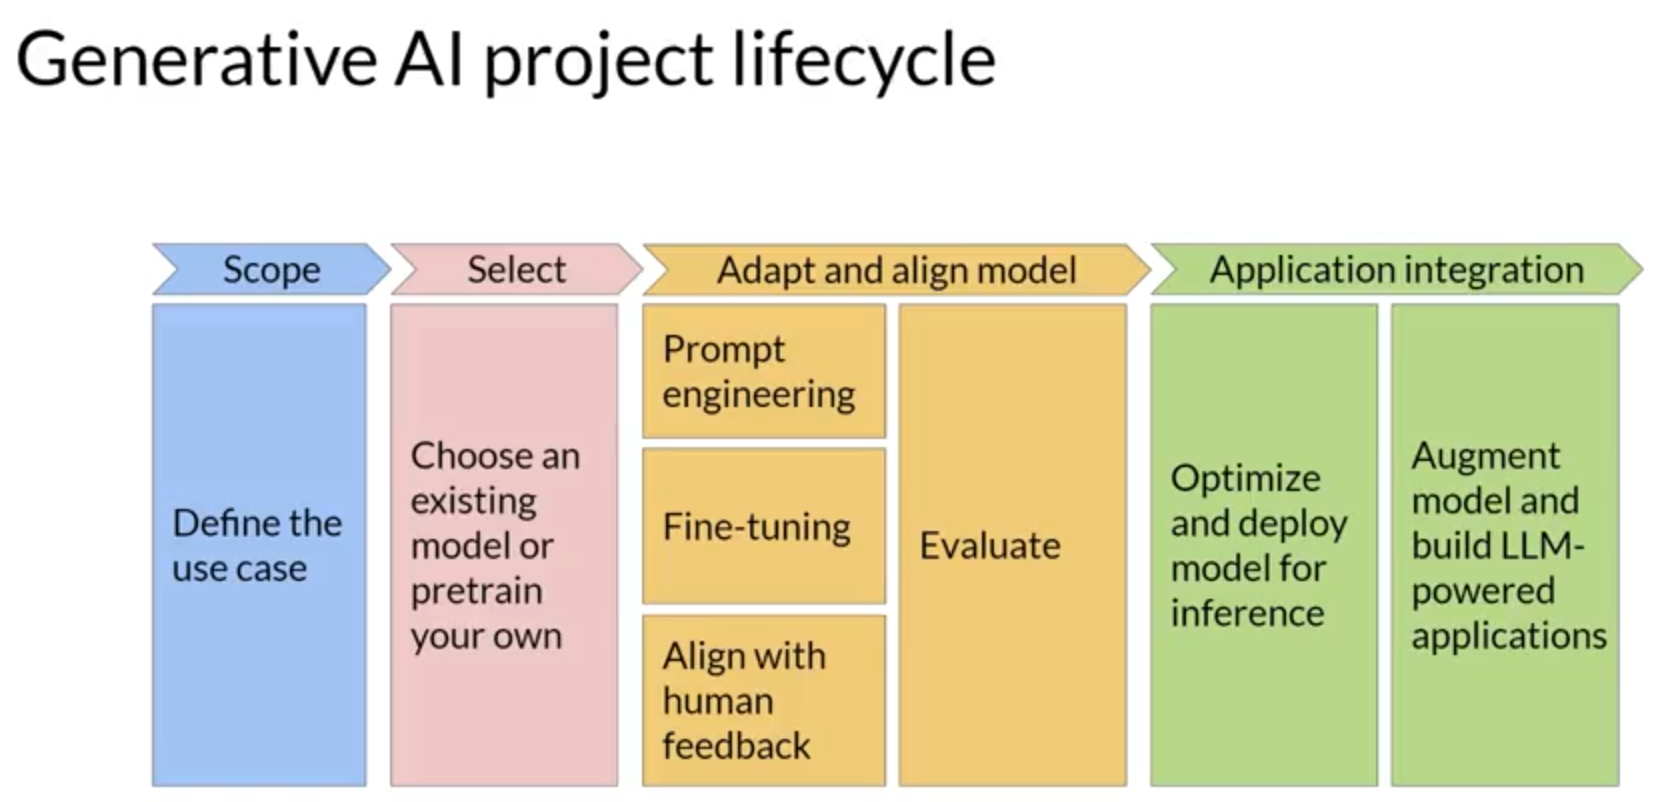

## In-context learning

Providing examples inside
the context window is called in-context learning.
 zero-shot inference. The largest of the LLMs are
surprisingly good at this, grasping the task to be completed and returning
a good answer.
This is known as
few-shot inference. 
you can engineer your prompts to encourage the
model to learn by examples. While the largest
models are good at zero-shot inference
with no examples, smaller models can
benefit from one-shot or few-shot inference that include examples of the
desired behavior. But remember the context window
because you have a limit on the amount of
in-context learning that you can pass
into the model. Generally, if you
find that your model isn't performing well when, say, including five or six examples, you should try fine-tuning
your model instead. 

## FineTuning

Training large language models (LLMs) is computationally intensive, requiring substantial memory not only for storing the model, which can be hundreds of gigabytes, but also for other components such as optimizer states, gradients, and forward activations. Full fine-tuning is resource-demanding as it updates every model weight, making it challenging on consumer hardware. Parameter Efficient Fine Tuning (PEFT) offers a solution by updating a smaller subset of parameters, reducing memory requirements. PEFT methods may freeze most model weights, tuning only specific layers or adding new parameters, thus avoiding the catastrophic forgetting seen in full fine-tuning. This leads to smaller task-specific models, reducing storage concerns. PEFT can often be done on a single GPU, and trained parameters for tasks are easily managed. Three PEFT methods are discussed:

1. **Selective Methods**: Fine-tune only a subset of original parameters, though with mixed performance results.
2. **Reparameterization Methods**: Create low-rank transformations of weights to reduce parameters, exemplified by the LoRA technique.
3. **Additive Methods**: Introduce new components while keeping original weights frozen. Adapter methods add layers inside the architecture, while soft prompt methods alter input prompts.

The course focuses on the LoRA method for memory-efficient training, and will explore a soft prompt technique called prompt tuning.


Low-rank Adaptation (LoRA) is a parameter-efficient fine-tuning method for large language models (LLMs), classified under re-parameterization strategies. Instead of updating all parameters during fine-tuning, LoRA freezes the original model parameters and incorporates **low-rank decomposition matrices** to reduce the number of trainable parameters. The approach modifies only the self-attention layers, offering substantial savings, as these layers contain most of the LLM's parameters. By maintaining the original model's parameter count, LoRA minimally impacts inference latency while using less computational power, often needing just a single GPU. LoRA allows for creating multiple task-specific low-rank matrices, which can be quickly swapped during inference, reducing the need to store multiple full models. Evaluations using metrics like ROUGE show that LoRA can achieve near full-fine-tuning performance while training many fewer parameters. Choosing the rank of LoRA matrices affects performance and computational savings, with research suggesting ranks between 4 and 32 as optimal. Overall, LoRA offers a versatile and efficient method for fine-tuning not only LLMs but potentially models in other domains as well.


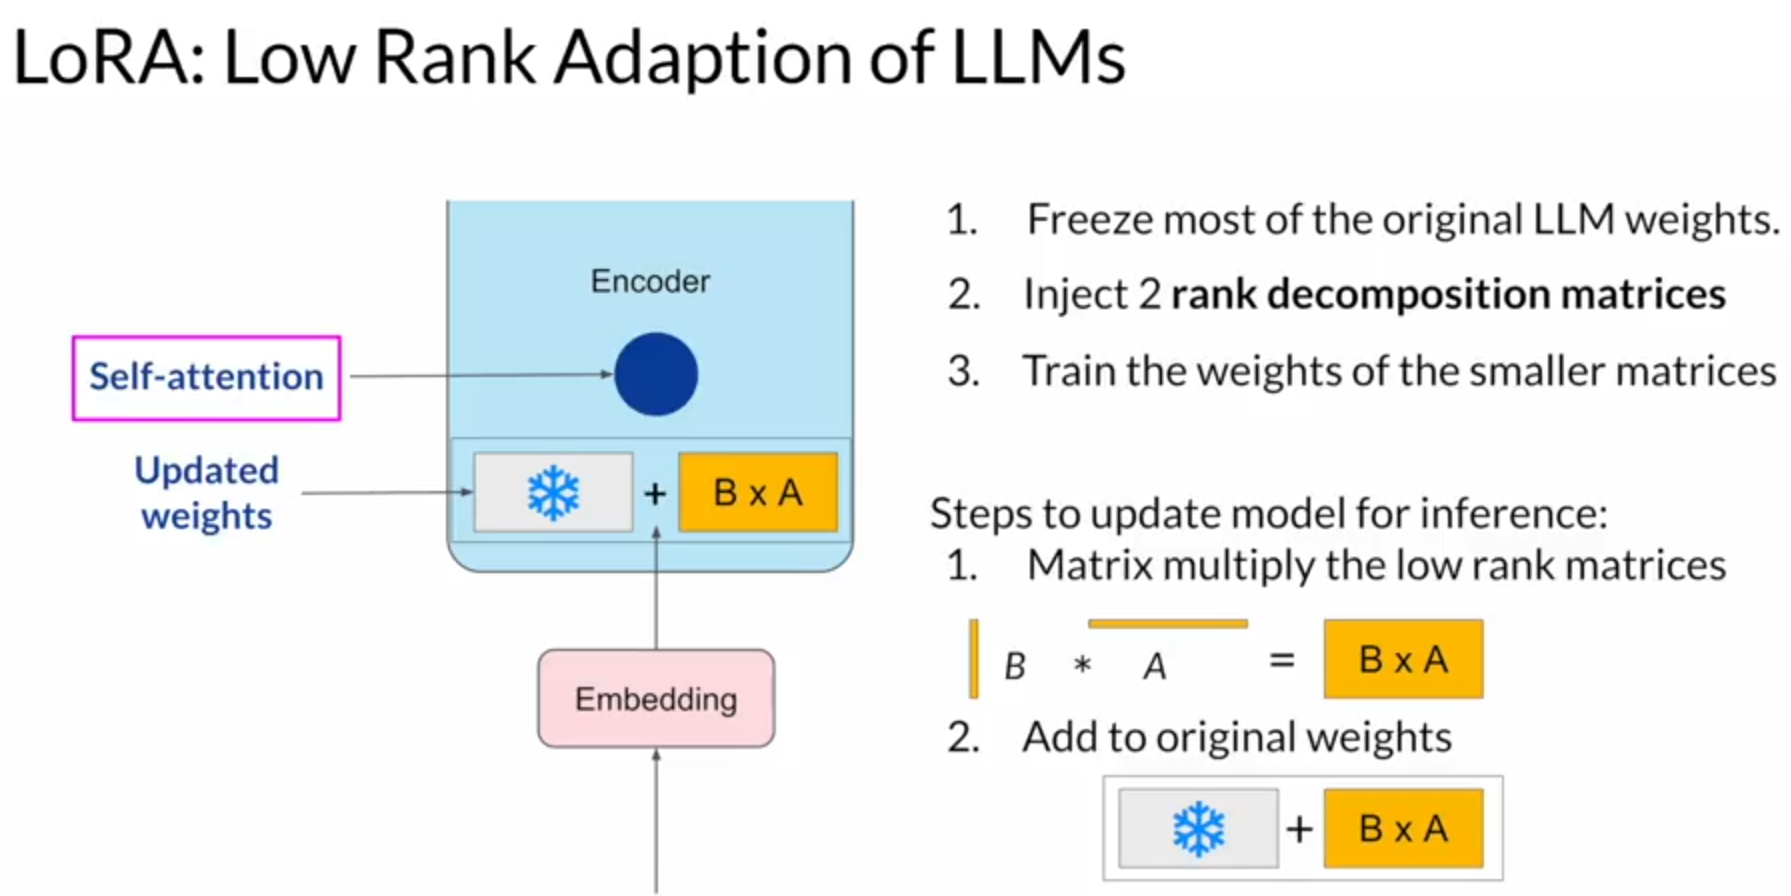

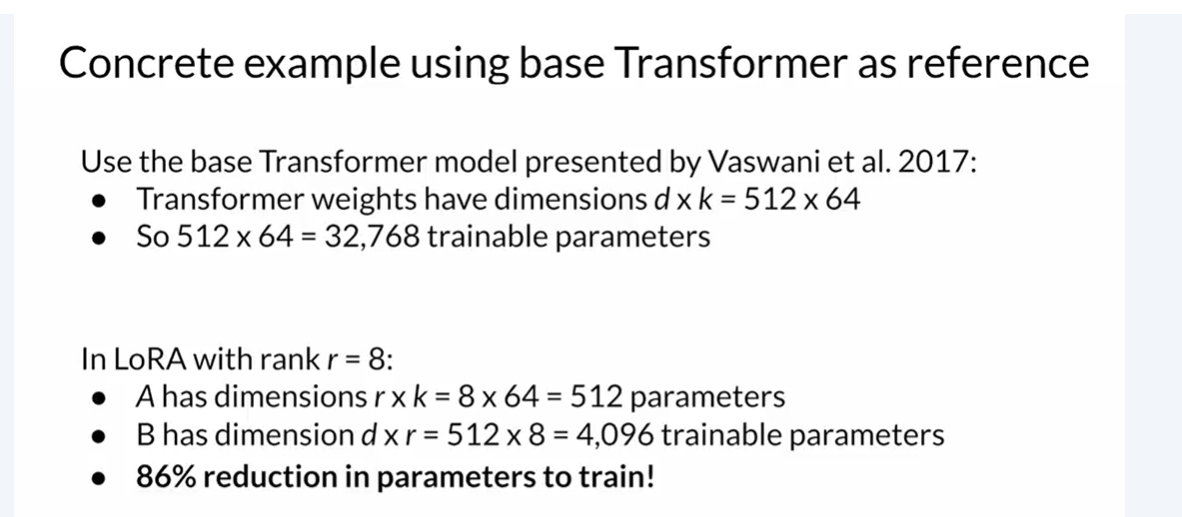

The text discusses parameter-efficient fine-tuning (PEFT) methods, with a focus on LoRA and prompt tuning. PEFT aims to improve model performance by efficiently
 updating or augmenting the model’s weights without the need for full retraining. LoRA updates a model’s parameters using rank decomposition matrices, while pro
mpt tuning involves adding trainable tokens, known as soft prompts, to prepend input texts for optimizing task-specific outcomes. Unlike full fine-tuning, prompt tuning keeps the model weights frozen and only updates the soft prompt vectors, making it more efficient.

Prompt tuning is different from prompt engineering, which involves crafting prompts manually to enhance model performance. Although prompt tuning may underperform compared to full fine-tuning in smaller models, it becomes comparably effective as model size increases, particularly in models with around 10 billion parameters. One challenge with prompt tuning is the interpretability of learned tokens, as they do not correspond to specific words but form semantically clustered groups.

The overview of the week's lessons includes exploring instruction fine-tuning, which adapts foundational models for specific tasks using prompt templates and evaluation metrics and learning about PEFT strategies like LoRA and prompt tuning to minimize compute and memory usage. The integration of LoRA and quantization, known as QLoRA, offers further reduction in resource use. The text highlights the advantage of PEFT in reducing costs while maintaining effectiveness in model fine-tuning processes.


## Evaluation

Traditional metrics such as accuracy used in machine learning cannot handle the complexity of language-based evaluations effectively. Two prominent metrics used are ROUGE and BLEU. ROUGE is primarily utilized for evaluating automatically generated summaries by comparing them to human references, while BLEU is used for assessing the quality of machine-translated text by comparing it with human translations. 

ROUGE scores involve calculating recall, precision, and F1 scores based on unigram matches (ROUGE-1), bigram matches (ROUGE-2), or longest common subsequences (ROUGE-L), but can sometimes be deceptive as they might reward repeated words or different word orders similarly to human-like sentences. A clipping function can
 mitigate this by limiting unigram matches to what's present in the reference. BLEU scores evaluate translations by averaging precision over different n-gram si
zes, offering a summary value that approaches 1 as candidates get closer to the reference sentence. While ROUGE and BLEU are low-cost and straightforward metric
s useful for model iteration, they're not suitable for comprehensive evaluation of large language models. More detailed evaluation requires using specialized benchmarks developed by researchers. Pre-written libraries, such as those from Hugging Face, facilitate calculation of these metrics.


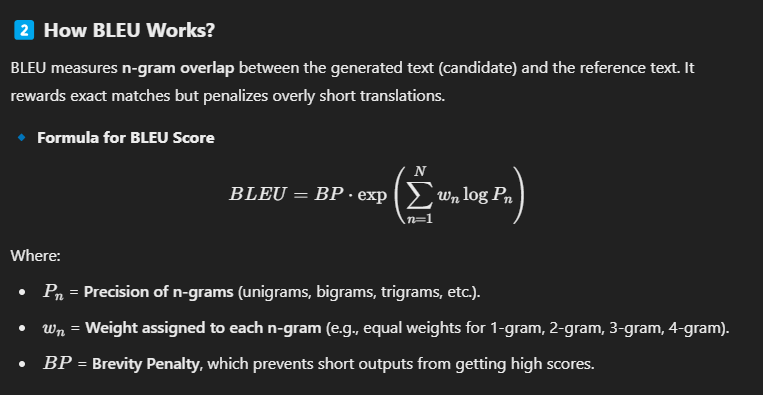

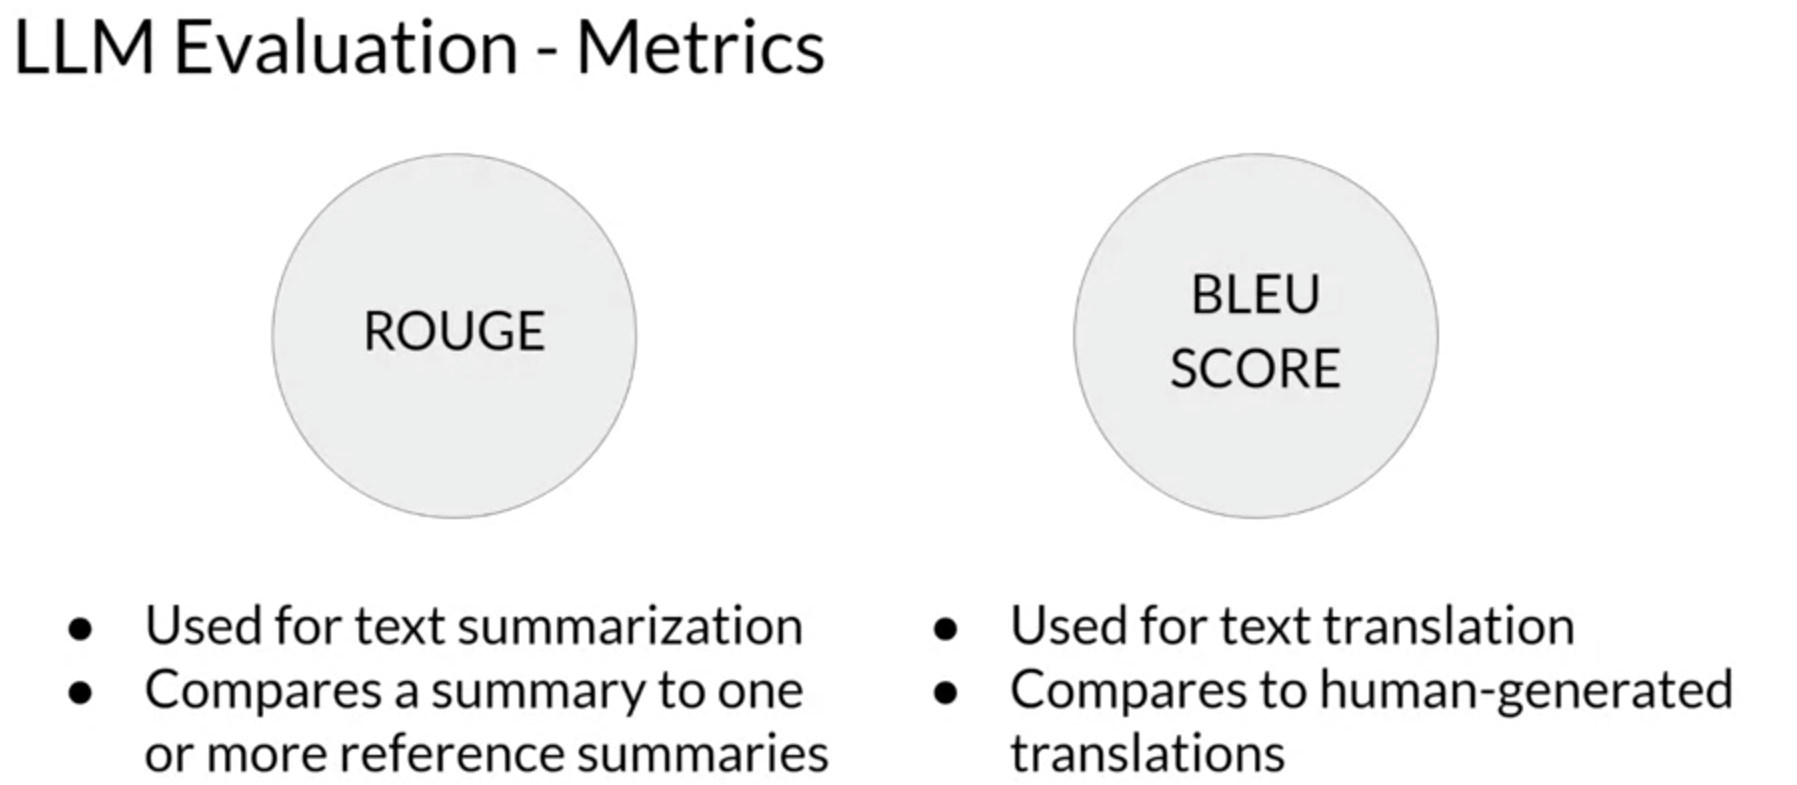

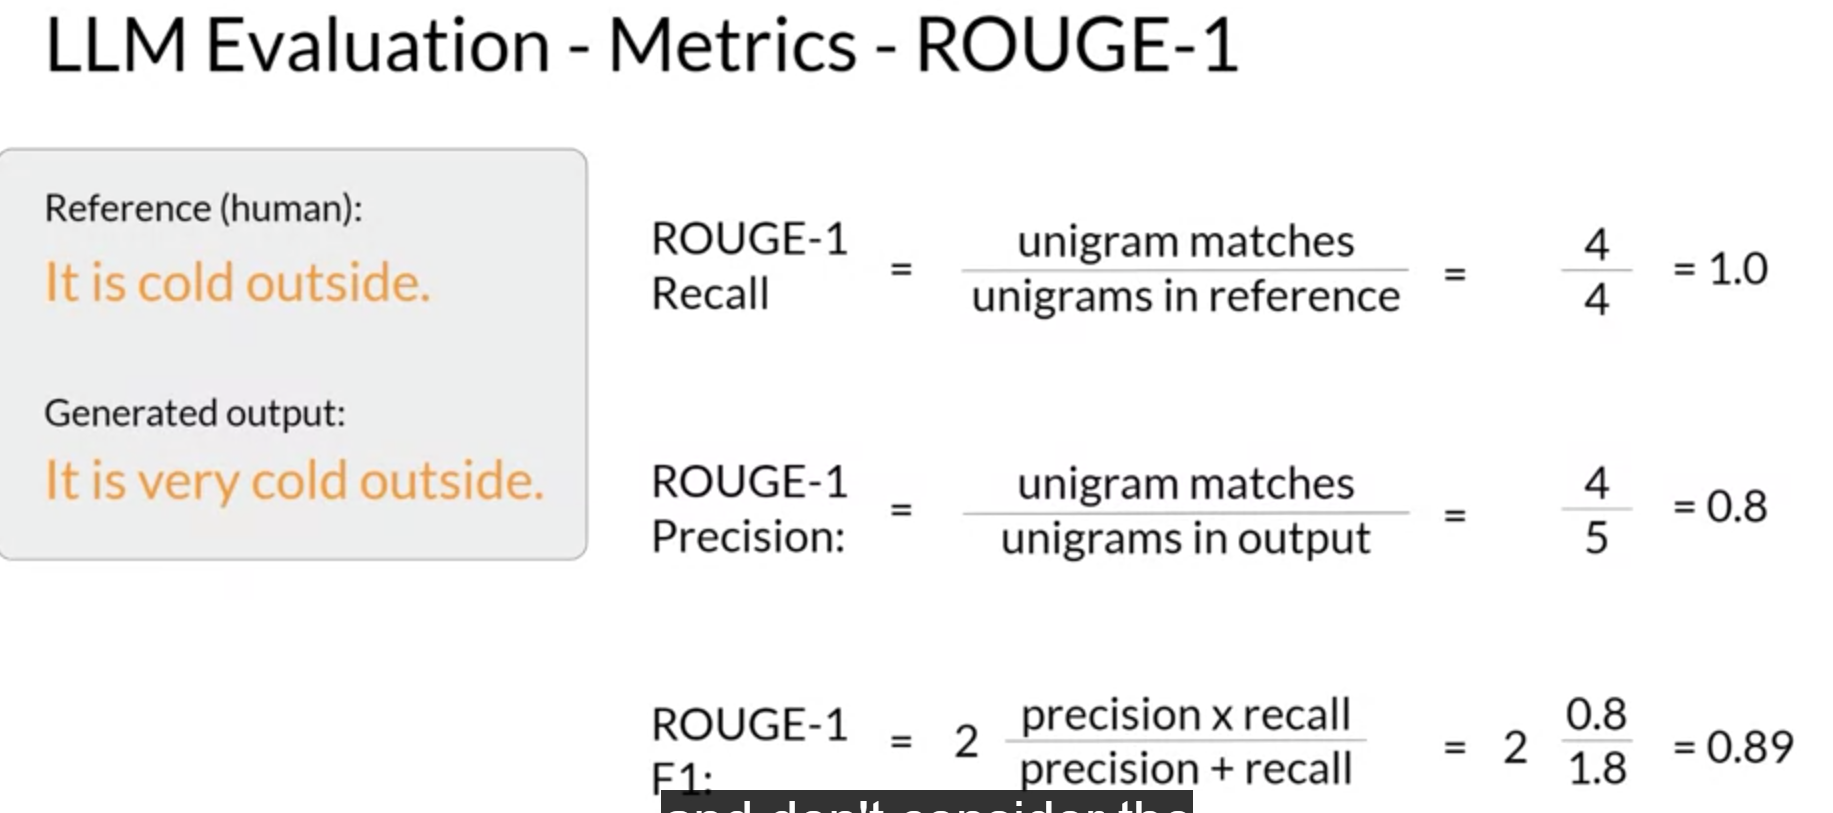

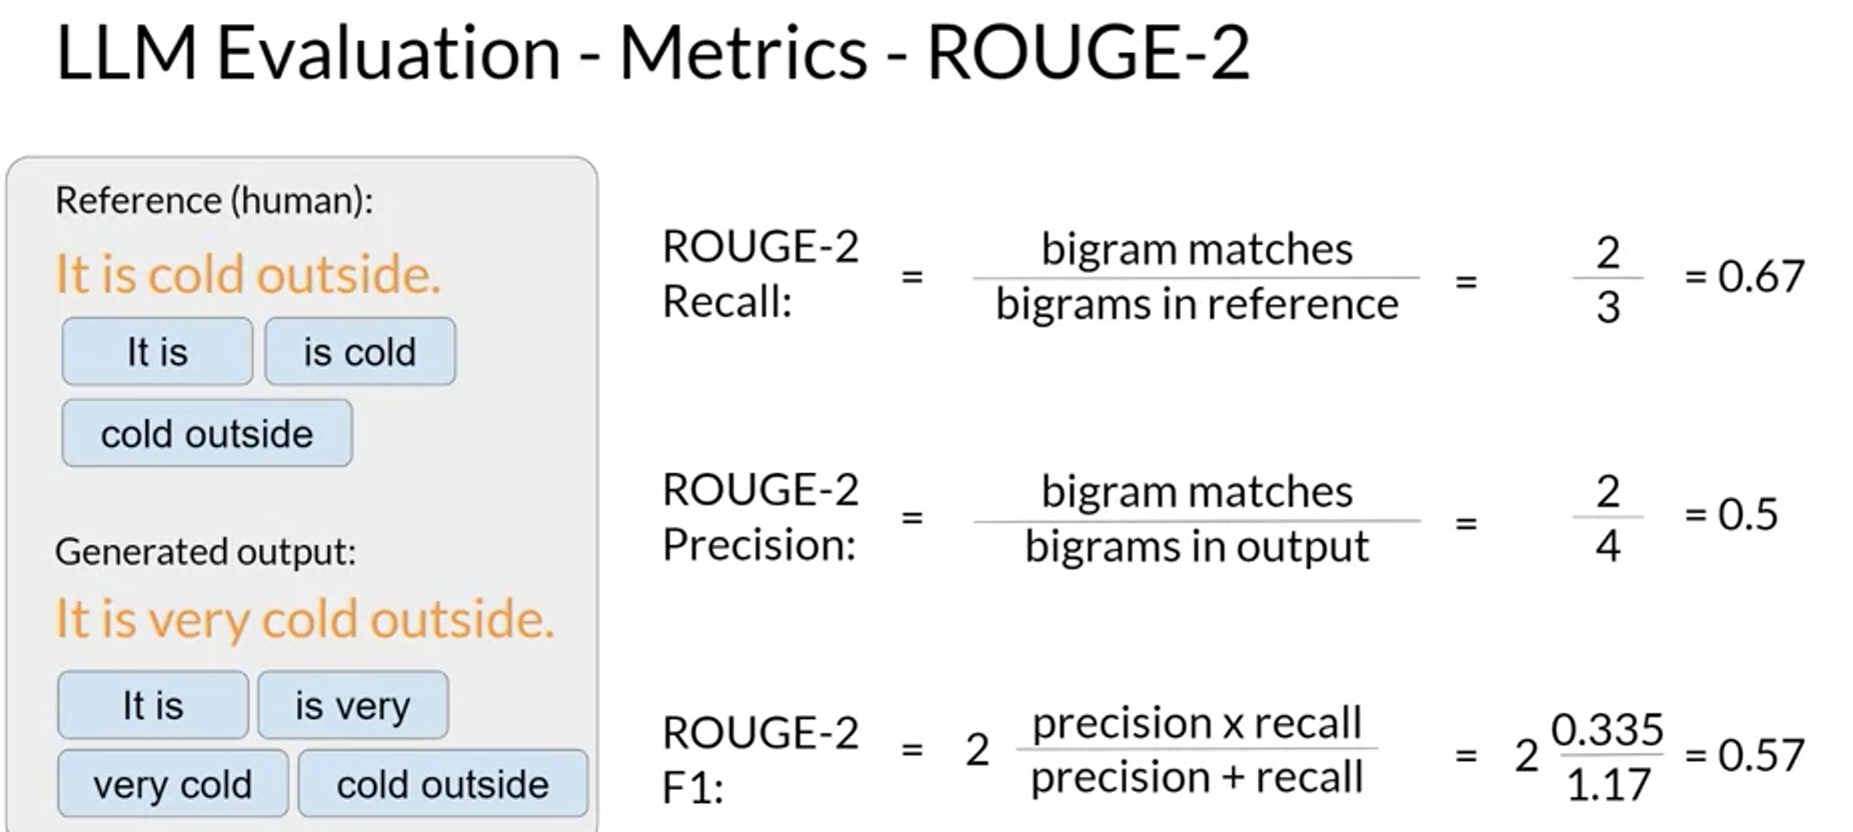

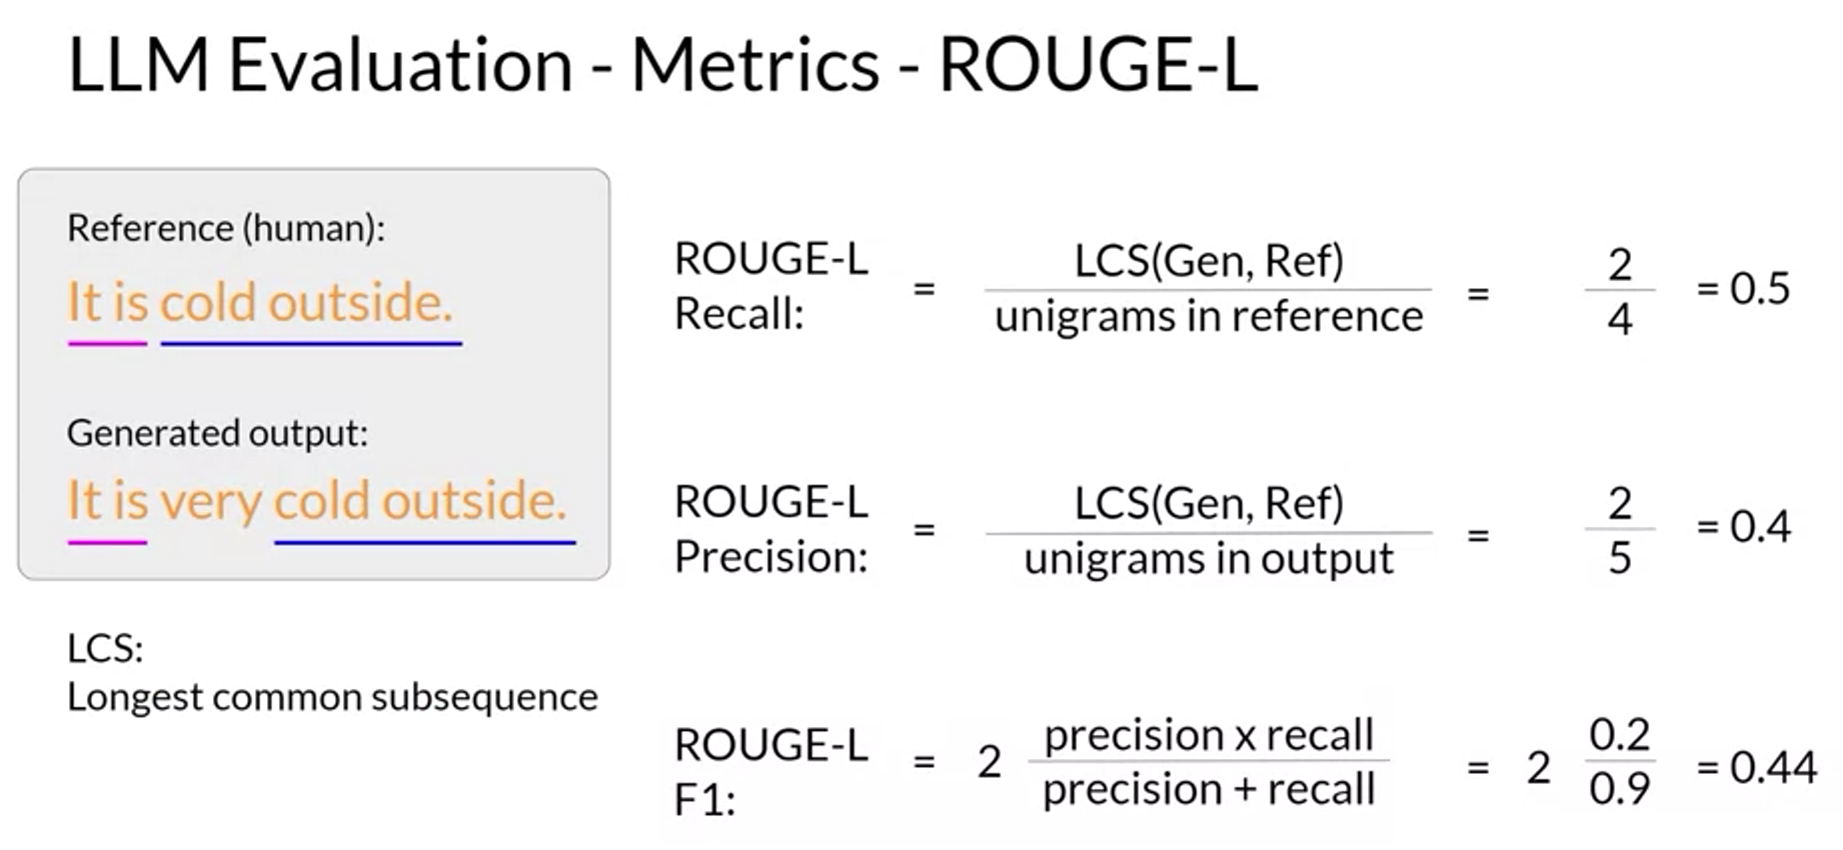

# Prompting

## Prompting Principles
- **Principle 1: Write clear and specific instructions**
- **Principle 2: Give the model time to “think”**



### Principle 1: Write clear and specific instructions



#### Tactic 1: Use delimiters to clearly indicate distinct parts of the input
- Delimiters can be anything like: ```, """, < >, `<tag> </tag>`, `:`

In [ ]:
text = """
You should express what you want a model to do by \ 
providing instructions that are as clear and \ 
specific as you can possibly make them. \ 
This will guide the model towards the desired output, \ 
and reduce the chances of receiving irrelevant \ 
or incorrect responses. Don't confuse writing a \ 
clear prompt with writing a short prompt. \ 
In many cases, longer prompts provide more clarity \ 
and context for the model, which can lead to \ 
more detailed and relevant outputs.
"""
prompt = f"""
Summarize the text delimited by triple backticks \ 
into a single sentence.
```{text}```
"""

#### Tactic 2: Ask the model to check whether conditions are satisfied

In [ ]:
text_1 = """
Making a cup of tea is easy! First, you need to get some \ 
water boiling. While that's happening, \ 
grab a cup and put a tea bag in it. Once the water is \ 
hot enough, just pour it over the tea bag. \ 
Let it sit for a bit so the tea can steep. After a \ 
few minutes, take out the tea bag. If you \ 
like, you can add some sugar or milk to taste. \ 
And that's it! You've got yourself a delicious \ 
cup of tea to enjoy.
"""
prompt = f"""
You will be provided with text delimited by triple quotes. 
If it contains a sequence of instructions, \ 
re-write those instructions in the following format:

Step 1 - ...
Step 2 - …
…
Step N - …

If the text does not contain a sequence of instructions, \ 
then simply write \"No steps provided.\"

\"\"\"{text_1}\"\"\"
"""

#### Tactic 3: "Few-shot" prompting

In [ ]:
prompt = """
Your task is to answer in a consistent style.

<child>: Teach me about patience.

<grandparent>: The river that carves the deepest \ 
valley flows from a modest spring; the \ 
grandest symphony originates from a single note; \ 
the most intricate tapestry begins with a solitary thread.

<child>: Teach me about resilience.
"""

### Principle 2: Give the model time to “think” 

#### Tactic 1: Specify the steps required to complete a task

In [ ]:
text = """
In a charming village, siblings Jack and Jill set out on \ 
a quest to fetch water from a hilltop \ 
well. As they climbed, singing joyfully, misfortune \ 
struck—Jack tripped on a stone and tumbled \ 
down the hill, with Jill following suit. \ 
Though slightly battered, the pair returned home to \ 
comforting embraces. Despite the mishap, \ 
their adventurous spirits remained undimmed, and they \ 
continued exploring with delight.
"""
# example 1
prompt_1 = f"""
Perform the following actions: 
1 - Summarize the following text delimited by triple \
backticks with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the following \
keys: french_summary, num_names.

Separate your answers with line breaks.

Text:
```{text}```
"""


#### Ask for output in a specified format

In [ ]:
prompt_2 = f"""
Your task is to perform the following actions: 
1 - Summarize the following text delimited by 
  <> with 1 sentence.
2 - Translate the summary into French.
3 - List each name in the French summary.
4 - Output a json object that contains the 
  following keys: french_summary, num_names.

Use the following format:
Text: <text to summarize>
Summary: <summary>
Translation: <summary translation>
Names: <list of names in summary>
Output JSON: <json with summary and num_names>

Text: <{text}>
"""
response = get_completion(prompt_2)
print("\nCompletion for prompt 2:")
print(response)

#### Tactic 2: Instruct the model to work out its own solution before rushing to a conclusion

In [ ]:
prompt = """
Determine if the student's solution is correct or not.

Question:
I'm building a solar power installation and I need \
 help working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \ 
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations 
as a function of the number of square feet.

Student's Solution:
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
"""

#### Note that the student's solution is actually not correct.
#### We can fix this by instructing the model to work out its own solution first.

In [ ]:
prompt = """
Your task is to determine if the student's solution \
is correct or not.
To solve the problem do the following:
- First, work out your own solution to the problem including the final total. 
- Then compare your solution to the student's solution \ 
and evaluate if the student's solution is correct or not. 
Don't decide if the student's solution is correct until 
you have done the problem yourself.

Use the following format:
Question:
```
question here
```
Student's solution:
```
student's solution here
```
Actual solution:
```
steps to work out the solution and your solution here
```
Is the student's solution the same as actual solution \
just calculated:
```
yes or no
```
Student grade:
```
correct or incorrect
```

Question:
```
I'm building a solar power installation and I need help \
working out the financials. 
- Land costs $100 / square foot
- I can buy solar panels for $250 / square foot
- I negotiated a contract for maintenance that will cost \
me a flat $100k per year, and an additional $10 / square \
foot
What is the total cost for the first year of operations \
as a function of the number of square feet.
``` 
Student's solution:
```
Let x be the size of the installation in square feet.
Costs:
1. Land cost: 100x
2. Solar panel cost: 250x
3. Maintenance cost: 100,000 + 100x
Total cost: 100x + 250x + 100,000 + 100x = 450x + 100,000
```
Actual solution:
"""

## Model Limitations: Hallucinations
- Boie is a real company, the product name is not real.

In [ ]:
prompt = """
Tell me about AeroGlide UltraSlim Smart Toothbrush by Boie
"""


Base model.
Instruction finetuned model.
Total tokens =  Prompt token(context length) + Response token


In [ ]:
# chain of thought reasoning
delimiter = "####"
system_message = f"""
Follow these steps to answer the customer queries.
The customer query will be delimited with four hashtags,\
i.e. {delimiter}. 

Step 1:{delimiter} First decide whether the user is \
asking a question about a specific product or products. \
Product cateogry doesn't count. 

Step 2:{delimiter} If the user is asking about \
specific products, identify whether \
the products are in the following list.
All available products: 
1. Product: TechPro Ultrabook
   Category: Computers and Laptops
   Brand: TechPro
   Model Number: TP-UB100
   Warranty: 1 year
   Rating: 4.5
   Features: 13.3-inch display, 8GB RAM, 256GB SSD, Intel Core i5 processor
   Description: A sleek and lightweight ultrabook for everyday use.
   Price: $799.99

2. Product: BlueWave Gaming Laptop
   Category: Computers and Laptops
   Brand: BlueWave
   Model Number: BW-GL200
   Warranty: 2 years
   Rating: 4.7
   Features: 15.6-inch display, 16GB RAM, 512GB SSD, NVIDIA GeForce RTX 3060
   Description: A high-performance gaming laptop for an immersive experience.
   Price: $1199.99

3. Product: PowerLite Convertible
   Category: Computers and Laptops
   Brand: PowerLite
   Model Number: PL-CV300
   Warranty: 1 year
   Rating: 4.3
   Features: 14-inch touchscreen, 8GB RAM, 256GB SSD, 360-degree hinge
   Description: A versatile convertible laptop with a responsive touchscreen.
   Price: $699.99

4. Product: TechPro Desktop
   Category: Computers and Laptops
   Brand: TechPro
   Model Number: TP-DT500
   Warranty: 1 year
   Rating: 4.4
   Features: Intel Core i7 processor, 16GB RAM, 1TB HDD, NVIDIA GeForce GTX 1660
   Description: A powerful desktop computer for work and play.
   Price: $999.99

5. Product: BlueWave Chromebook
   Category: Computers and Laptops
   Brand: BlueWave
   Model Number: BW-CB100
   Warranty: 1 year
   Rating: 4.1
   Features: 11.6-inch display, 4GB RAM, 32GB eMMC, Chrome OS
   Description: A compact and affordable Chromebook for everyday tasks.
   Price: $249.99

Step 3:{delimiter} If the message contains products \
in the list above, list any assumptions that the \
user is making in their \
message e.g. that Laptop X is bigger than \
Laptop Y, or that Laptop Z has a 2 year warranty.

Step 4:{delimiter}: If the user made any assumptions, \
figure out whether the assumption is true based on your \
product information. 

Step 5:{delimiter}: First, politely correct the \
customer's incorrect assumptions if applicable. \
Only mention or reference products in the list of \
5 available products, as these are the only 5 \
products that the store sells. \
Answer the customer in a friendly tone.

Use the following format:
Step 1:{delimiter} <step 1 reasoning>
Step 2:{delimiter} <step 2 reasoning>
Step 3:{delimiter} <step 3 reasoning>
Step 4:{delimiter} <step 4 reasoning>
Response to user:{delimiter} <response to customer>

Make sure to include {delimiter} to separate every step.
"""